In [301]:
import pandas as pd

from sklearn.datasets import load_iris

In [302]:
file = load_iris()
file.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [303]:
data = file['data']
data = pd.DataFrame(data=data, columns = file['feature_names'])
data
data.shape

(150, 4)

In [304]:
target = file['target']
target = pd.DataFrame(file['target'], columns = ['variety'])
target

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [305]:
file['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [306]:
iris_data = pd.concat((data, target), axis = 'columns')
iris_data.shape

(150, 5)

In [307]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   variety            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### 전처리

In [308]:
iris_data.duplicated().sum()
# 중복값이 1개 있지만 고려하지 않겠음

1

In [309]:
iris_data.isna().sum()
# 결측치 없음

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
variety              0
dtype: int64

In [310]:
data_col = iris_data.columns.tolist()
data_col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'variety']

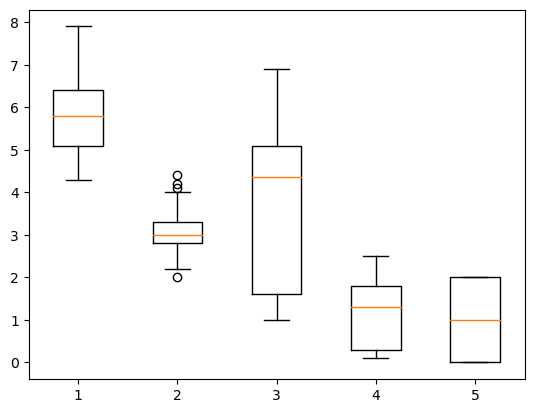

In [311]:
import matplotlib.pyplot as plt
plt.boxplot(iris_data)
plt.show()
# 2번 컬럼에서 이상치 발견

In [312]:
data_col[1]
# 2번 컬럼의 이름

'sepal width (cm)'

In [313]:
col = data[data_col[1]]

upper = col.quantile(0.75)
lower = col.quantile(0.25)
iris_data.shape

(150, 5)

In [314]:
mask = col < lower
iris_data[~mask].shape

#iris_data = iris_data[mask]
#iris_data.shape

(117, 5)

### 타겟 데이터와 피쳐 데이터 분리

In [315]:
target

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [316]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [317]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [318]:
col_list = data.columns.tolist()
col_list

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

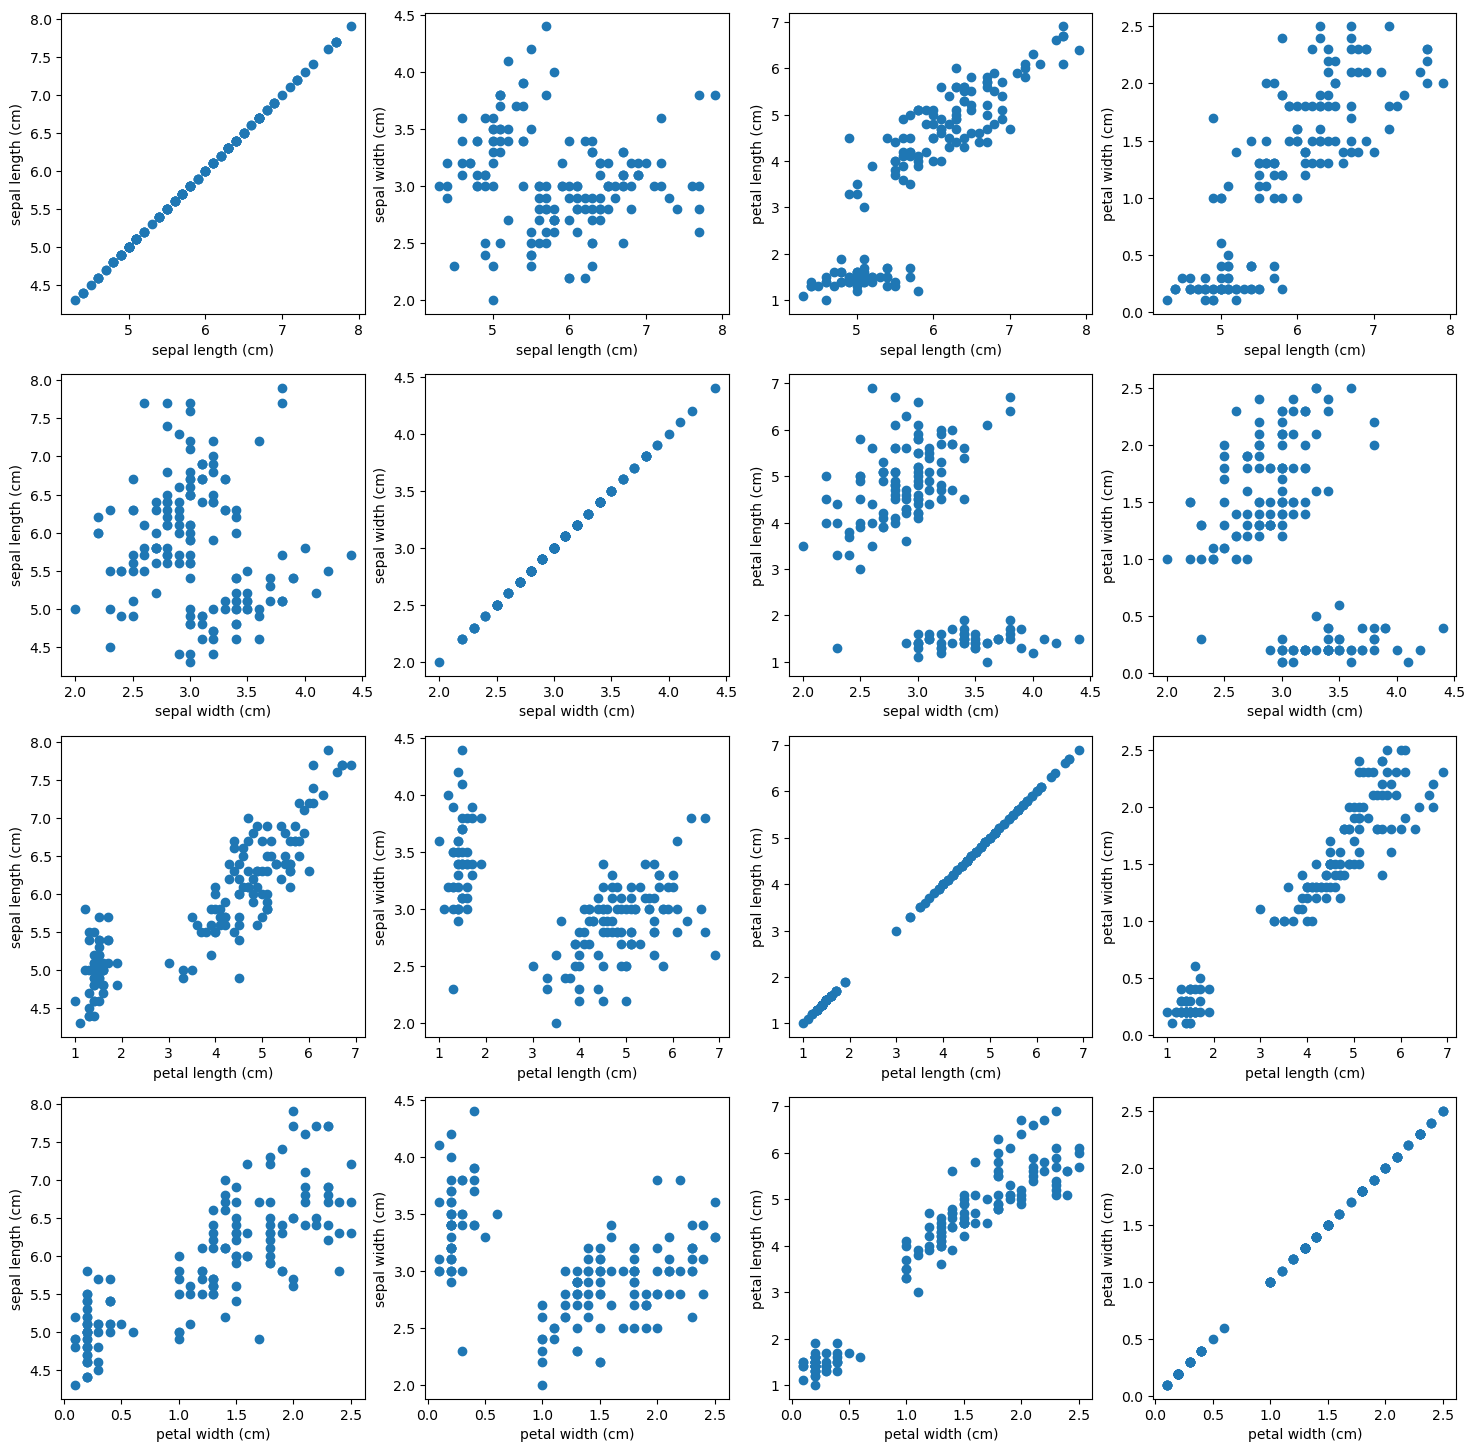

In [319]:
num = 1
plt.figure(figsize = (18,18))
for i in range(4):
    for k in range(4):
        plt.subplot(4, 4, num)
        plt.scatter(data[col_list[i]], data[col_list[k]])
        plt.xlabel(col_list[i])
        plt.ylabel(col_list[k])

        num += 1
plt.show()

In [320]:
# 높은 상관관계가 보이는 것은 petal length 와 petal width이므로 이 둘을 가지로 분류 모델을 만들어보겠다.

In [321]:
iris_data = iris_data[iris_data['variety'] != 2]
iris_data.shape

(100, 5)

In [322]:
target = iris_data['variety']
target.shape

(100,)

In [323]:
feature = iris_data[['petal width (cm)', 'petal length (cm)']]
feature.shape

(100, 2)

### 테스트 데이터와 트레이닝 데이터 분리

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 7, stratify = target)


### 스케일링

In [325]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit(X_train)

StandardScaler()

In [326]:
scaled_X_train = scale.transform(X_train)

In [327]:
scaled_X_test = scale.transform(X_test)

### 학습 , 예측, 평가

In [328]:
 # KNN으로 분류해보자
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [329]:
model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [330]:
model.score(scaled_X_test, y_test)
model.score(scaled_X_train, y_train)

1.0